# Importing libraries

In [ ]:
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans , SpectralClustering , AgglomerativeClustering , Birch
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import pair_confusion_matrix

import pandas as pd 
# Pandas has been used to generate dataframe of accuray metrics of various models only
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [ ]:
breast_cancer = datasets.load_breast_cancer()
scaler = StandardScaler()

In [ ]:
X =  breast_cancer.data
X_scaled = scaler.fit_transform(breast_cancer.data)
y = breast_cancer.target
np.random.seed(15)

In [ ]:
# For Subplots we have refrenced - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
# For 3D graph - https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
# For Accuracy score we have refrenced - https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

# K-Means Clustering

In [ ]:
# For K-means Model we have refrenced - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [ ]:
kmodel =  KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=None)
ypred_kmeans_normal = kmodel.fit_predict(X)
ypred_kmeans_scaled = kmodel.fit_predict(X_scaled)

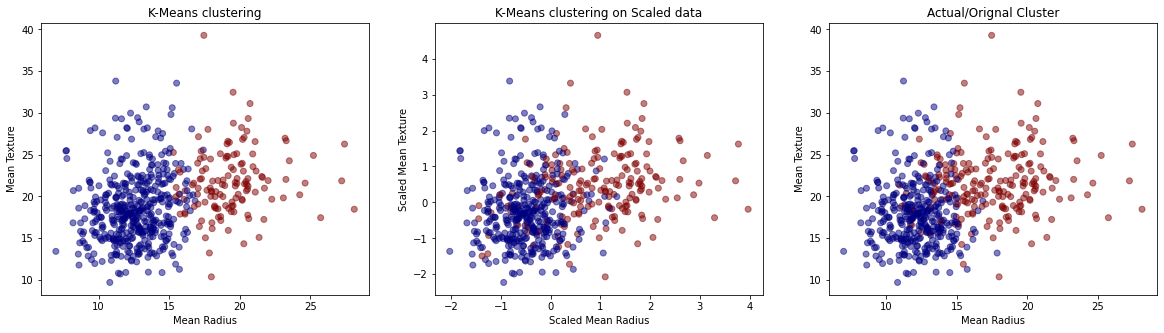

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],  c=ypred_kmeans_normal, cmap = "jet",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('K-Means clustering')

plt.subplot(132)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=ypred_kmeans_scaled, cmap = "jet_r",alpha=0.5)
plt.xlabel('Scaled Mean Radius')
plt.ylabel('Scaled Mean Texture')
plt.title('K-Means clustering on Scaled data')


plt.subplot(133)
plt.scatter(X[:,0],X[:,1],  c=y, cmap = "jet_r",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Actual/Orignal Cluster')
plt.show()

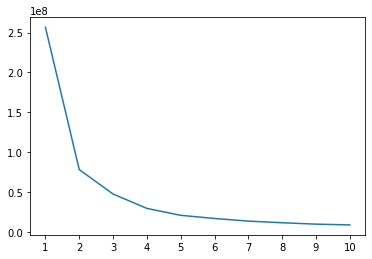

In [ ]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(X)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.xticks(np.arange(1,11,1))
plt.show()

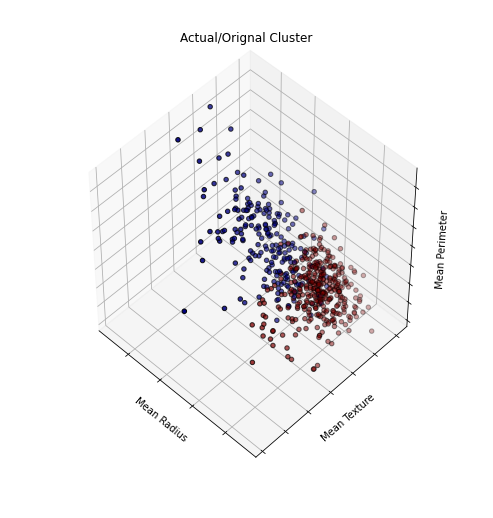

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='jet', edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Mean Radius")
ax.set_ylabel("Mean Texture")
ax.set_zlabel("Mean Perimeter")
ax.set_title('Actual/Orignal Cluster')
ax.dist=12

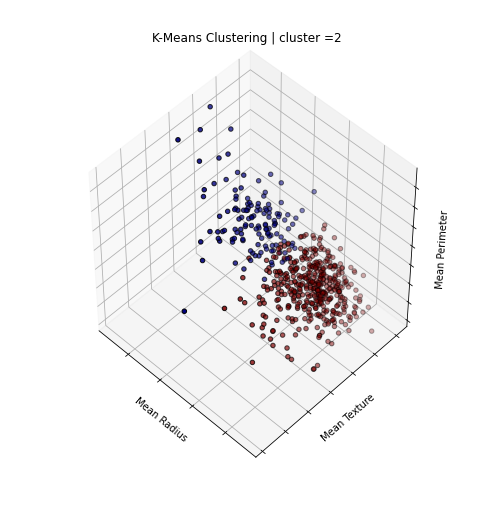

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=ypred_kmeans_normal, cmap='jet_r',edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Mean Radius")
ax.set_ylabel("Mean Texture")
ax.set_zlabel("Mean Perimeter")
ax.set_title('K-Means Clustering | cluster =2')
ax.dist=12

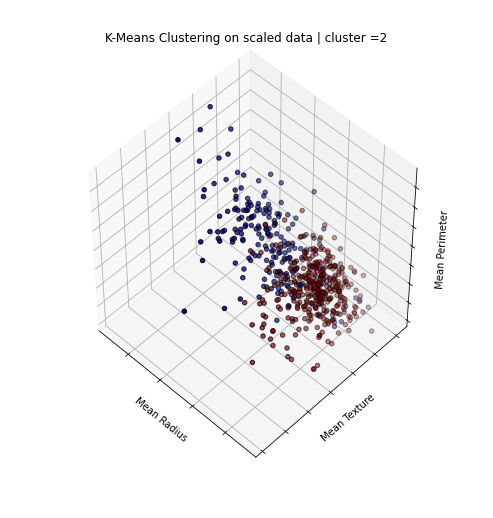

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=ypred_kmeans_scaled, cmap='jet',edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Mean Radius")
ax.set_ylabel("Mean Texture")
ax.set_zlabel("Mean Perimeter")
ax.set_title('K-Means Clustering on scaled data | cluster =2')
ax.dist=12

In [ ]:
estimators_kmeans = [
    ("k_means_breast_cancer_2", KMeans(n_clusters=2)),
    ("k_means_breast_cancer_3", KMeans(n_clusters=3)),
    ("k_means_breast_cancer_4", KMeans(n_clusters=4)),
    ("k_means_breast_cancer_bad_init_2", KMeans(n_clusters=2, n_init=5,init="random")),
    ("k_means_breast_cancer_300_iterations_2", KMeans(n_clusters=2, n_init=1, random_state=1,max_iter = 300))
]

In [ ]:
# method to make to store various metrics about model in a dictionary
models_kmeans = {}
scaled_models_kmeans = {}

def run_estimators_kmeans(mode):
  score_metrics = {}
  for name,est in estimators_kmeans:
    list=[]
    if (mode == 'normal'):
      labels = est.fit_predict(X)
    else:
      labels = est.fit_predict(X_scaled)

    list.append(str(est).split('s',1)[1])
    list.append(est.n_iter_)
    
    if ('2' in name):
      list.append((labels == y).sum())
    else:
      list.append('-')

    if (mode == 'normal'):
      models_kmeans['ypred_'+name] =  labels
      list.append(np.round(metrics.calinski_harabasz_score(X, labels),4))
      list.append(np.round(metrics.silhouette_score(X, labels, metric='euclidean'),4))
      list.append(np.round(metrics.davies_bouldin_score(X, labels),4))
    else:
      scaled_models_kmeans['ypred_'+name] =  labels
      list.append(np.round(metrics.calinski_harabasz_score(X_scaled, labels),4))
      list.append(np.round(metrics.silhouette_score(X_scaled, labels, metric='euclidean'),4))
      list.append(np.round(metrics.davies_bouldin_score(X_scaled, labels),4))

    list.append(np.round(metrics.homogeneity_score(y, labels),4))
    list.append(np.round(metrics.completeness_score(y, labels),4))
    list.append(np.round(metrics.v_measure_score(y,labels),4))
    list.append(np.round(metrics.rand_score(labels,y),4))
    list.append(np.round(metrics.adjusted_rand_score(y,labels),4))
    list.append(np.round(metrics.fowlkes_mallows_score(y, labels),4))
    score_metrics[name] = list

  return score_metrics

In [ ]:
normal_metrics_kmeans = run_estimators_kmeans('normal')
scaled_metrics_kmeans = run_estimators_kmeans('scaled')

In [ ]:
columns_kmeans = ['parameters','Number of Iterations','Correct Predictions','Calinski Harbaz Score','Sillhouette Score','Davies Bouldin Score','Homogeneity Score','Completness Score','V measure Score','Rand Score','Adjusted Rand Score','Fowlkes Mallows Score']

In [ ]:
Kmeans_accuracy_normal = pd.DataFrame(normal_metrics_kmeans,index=columns_kmeans)
Kmeans_accuracy_normal.T.sort_values('Adjusted Rand Score')

parameters  \
k_means_breast_cancer_4                                           (n_clusters=4)   
k_means_breast_cancer_2                                           (n_clusters=2)   
k_means_breast_cancer_bad_init_2         (init='random', n_clusters=2, n_init=5)   
k_means_breast_cancer_300_iterations_2  (n_clusters=2, n_init=1, random_state=1)   
k_means_breast_cancer_3                                           (n_clusters=3)   

                                       Number of Iterations  \
k_means_breast_cancer_4                                   9   
k_means_breast_cancer_2                                   9   
k_means_breast_cancer_bad_init_2                          7   
k_means_breast_cancer_300_iterations_2                    4   
k_means_breast_cancer_3                                   3   

                                       Correct Predictions  \
k_means_breast_cancer_4                                  -   
k_means_breast_cancer_2                                 83   
k_means_breast_cancer_bad_init_2                       486   
k_means_breast_cancer_300_iterations_2                  83   
k_means_breast_cancer_3                                  -   

                                       Calinski Harbaz Score  \
k_means_breast_cancer_4                            1465.6729   
k_means_breast_cancer_2                            1300.2082   
k_means_breast_cancer_bad_init_2                   1300.2082   
k_means_breast_cancer_300_iterations_2             1300.2082   
k_means_breast_cancer_3                            1251.5345   

                                       Sillhouette Score Davies Bouldin Score  \
k_means_breast_cancer_4                           0.5335               0.6177   
k_means_breast_cancer_2                           0.6973               0.5044   
k_means_breast_cancer_bad_init_2                  0.6973               0.5044   
k_means_breast_cancer_300_iterations_2            0.6973               0.5044   
k_means_breast_cancer_3                           0.6753               0.5519   

                                       Homogeneity Score Completness Score  \
k_means_breast_cancer_4                           0.5751            0.3333   
k_means_breast_cancer_2                           0.4223            0.5168   
k_means_breast_cancer_bad_init_2                  0.4223            0.5168   
k_means_breast_cancer_300_iterations_2            0.4223            0.5168   
k_means_breast_cancer_3                           0.4479             0.451   

                                       V measure Score Rand Score  \
k_means_breast_cancer_4                          0.422      0.701   
k_means_breast_cancer_2                         0.4648     0.7504   
k_means_breast_cancer_bad_init_2                0.4648     0.7504   
k_means_breast_cancer_300_iterations_2          0.4648     0.7504   
k_means_breast_cancer_3                         0.4494     0.7544   

                                       Adjusted Rand Score  \
k_means_breast_cancer_4                             0.4127   
k_means_breast_cancer_2                             0.4914   
k_means_breast_cancer_bad_init_2                    0.4914   
k_means_breast_cancer_300_iterations_2              0.4914   
k_means_breast_cancer_3                             0.5016   

                                       Fowlkes Mallows Score  
k_means_breast_cancer_4                               0.6762  
k_means_breast_cancer_2                               0.7915  
k_means_breast_cancer_bad_init_2                      0.7915  
k_means_breast_cancer_300_iterations_2                0.7915  
k_means_breast_cancer_3                               0.7877

In [ ]:
Kmeans_accuracy_scaled = pd.DataFrame(scaled_metrics_kmeans,index=columns_kmeans)
Kmeans_accuracy_scaled.T.sort_values('Adjusted Rand Score')

parameters  \
k_means_breast_cancer_3                                           (n_clusters=3)   
k_means_breast_cancer_4                                           (n_clusters=4)   
k_means_breast_cancer_2                                           (n_clusters=2)   
k_means_breast_cancer_bad_init_2         (init='random', n_clusters=2, n_init=5)   
k_means_breast_cancer_300_iterations_2  (n_clusters=2, n_init=1, random_state=1)   

                                       Number of Iterations  \
k_means_breast_cancer_3                                  17   
k_means_breast_cancer_4                                   8   
k_means_breast_cancer_2                                   5   
k_means_breast_cancer_bad_init_2                          8   
k_means_breast_cancer_300_iterations_2                    8   

                                       Correct Predictions  \
k_means_breast_cancer_3                                  -   
k_means_breast_cancer_4                                  -   
k_means_breast_cancer_2                                 54   
k_means_breast_cancer_bad_init_2                        54   
k_means_breast_cancer_300_iterations_2                  50   

                                       Calinski Harbaz Score  \
k_means_breast_cancer_3                              197.114   
k_means_breast_cancer_4                             158.9556   
k_means_breast_cancer_2                             267.6917   
k_means_breast_cancer_bad_init_2                    267.6917   
k_means_breast_cancer_300_iterations_2              267.6804   

                                       Sillhouette Score Davies Bouldin Score  \
k_means_breast_cancer_3                           0.3144               1.5294   
k_means_breast_cancer_4                           0.2798               1.5001   
k_means_breast_cancer_2                           0.3434               1.3205   
k_means_breast_cancer_bad_init_2                  0.3434               1.3205   
k_means_breast_cancer_300_iterations_2            0.3447               1.3093   

                                       Homogeneity Score Completness Score  \
k_means_breast_cancer_3                           0.5034            0.3637   
k_means_breast_cancer_4                           0.6069             0.373   
k_means_breast_cancer_2                           0.5249            0.5401   
k_means_breast_cancer_bad_init_2                  0.5249            0.5401   
k_means_breast_cancer_300_iterations_2             0.551            0.5735   

                                       V measure Score Rand Score  \
k_means_breast_cancer_3                         0.4223     0.7543   
k_means_breast_cancer_4                         0.4621     0.7739   
k_means_breast_cancer_2                         0.5324     0.8279   
k_means_breast_cancer_bad_init_2                0.5324     0.8279   
k_means_breast_cancer_300_iterations_2           0.562     0.8394   

                                       Adjusted Rand Score  \
k_means_breast_cancer_3                             0.5107   
k_means_breast_cancer_4                              0.552   
k_means_breast_cancer_2                             0.6536   
k_means_breast_cancer_bad_init_2                    0.6536   
k_means_breast_cancer_300_iterations_2              0.6765   

                                       Fowlkes Mallows Score  
k_means_breast_cancer_3                               0.7552  
k_means_breast_cancer_4                               0.7684  
k_means_breast_cancer_2                                0.841  
k_means_breast_cancer_bad_init_2                       0.841  
k_means_breast_cancer_300_iterations_2                0.8527

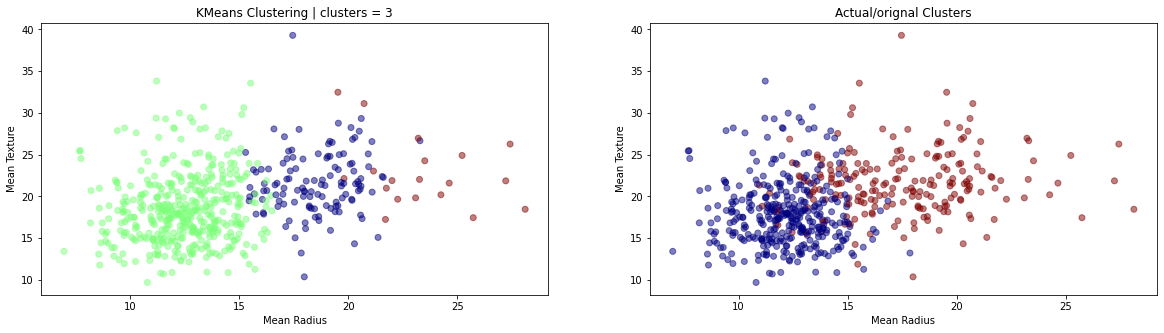

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.scatter(X[:,0],X[:,1],  c=models_kmeans['ypred_k_means_breast_cancer_3'], cmap = "jet",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('KMeans Clustering | clusters = 3')

plt.subplot(122)
plt.scatter(X[:,0],X[:,1],  c=y, cmap = "jet_r",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Actual/orignal Clusters')
plt.show()

# GMM-EM Clustering

In [ ]:
# For GMM-EM Model we have refrenced -  https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

In [ ]:
gmm_full = GaussianMixture(n_components = 2, covariance_type = "full").fit(X)
gmm_diag = GaussianMixture(n_components = 2, covariance_type = "diag").fit(X)
gmm_tied = GaussianMixture(n_components = 2, covariance_type = "tied").fit(X)
gmm_spherical = GaussianMixture(n_components = 2, covariance_type = "spherical").fit(X)

ypred_full = gmm_full.predict(X)
ypred_diag = gmm_diag.predict(X)
ypred_tied = gmm_tied.predict(X)
ypred_spherical = gmm_spherical.predict(X)

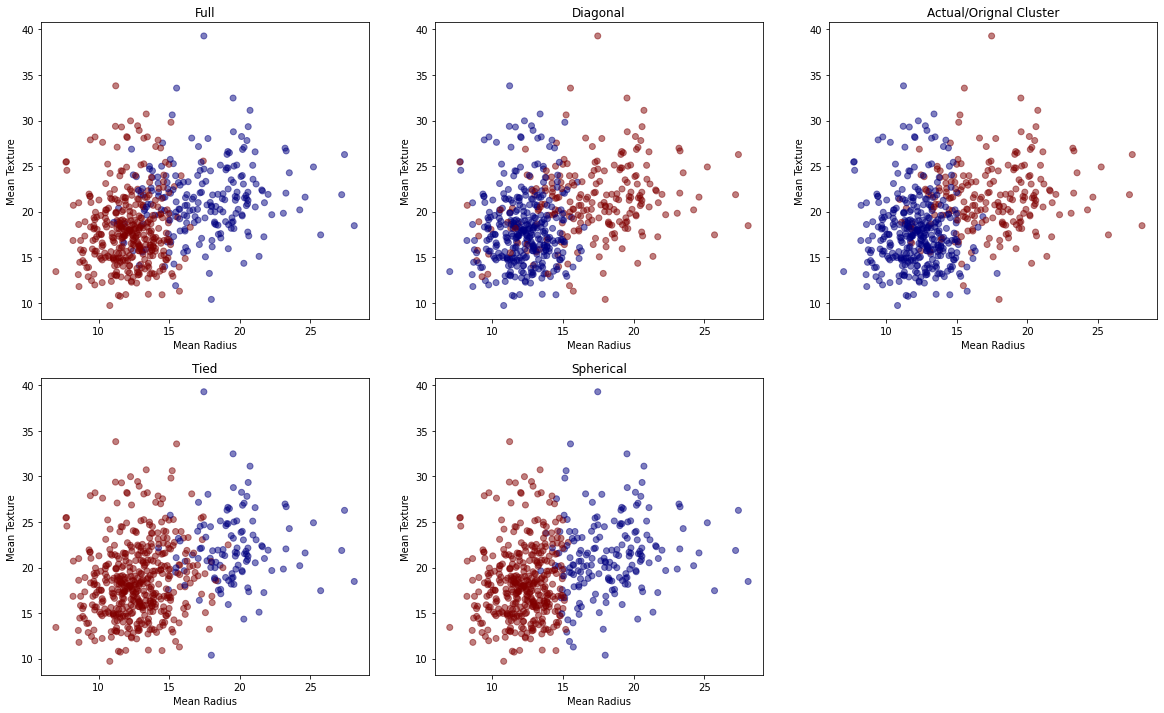

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(231)
plt.scatter(X[:,0],X[:,1],  c=ypred_full, cmap = "jet_r",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Full')

plt.subplot(232)
plt.scatter(X[:,0],X[:,1],  c=ypred_diag, cmap = "jet",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Diagonal')

plt.subplot(234)
plt.scatter(X[:,0],X[:,1],  c=ypred_tied, cmap = "jet",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Tied')

plt.subplot(235)
plt.scatter(X[:,0],X[:,1],  c=ypred_spherical, cmap = "jet",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Spherical')

plt.subplot(233)
plt.scatter(X[:,0],X[:,1],  c=y, cmap = "jet_r",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Actual/Orignal Cluster')
plt.show()

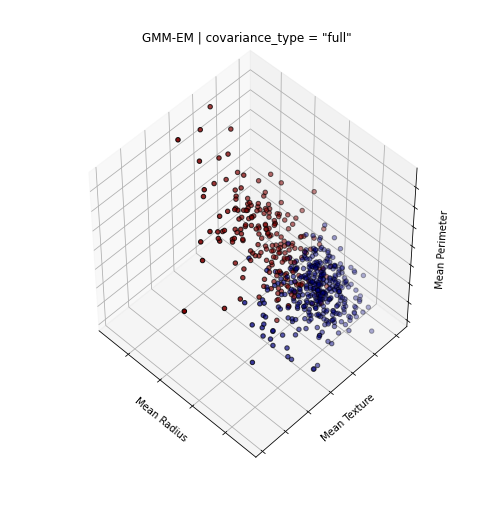

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=ypred_full, cmap='jet', edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Mean Radius")
ax.set_ylabel("Mean Texture")
ax.set_zlabel("Mean Perimeter")
ax.set_title('GMM-EM | covariance_type = \"full\"')
ax.dist=12

In [ ]:
model_dict={'Full':ypred_full,'Diagonal':ypred_diag,'Tied':ypred_tied,'Spherical':ypred_spherical}

In [ ]:
score = {}
for model,pred in model_dict.items():
  list=[]
  list.append((pred == y).sum())
  list.append(np.round(metrics.calinski_harabasz_score(X, pred),4))
  list.append(np.round(metrics.homogeneity_score(y, pred),4))
  list.append(np.round(metrics.completeness_score(y, pred),4))
  list.append(np.round(metrics.v_measure_score(y,pred),4))
  list.append(np.round(metrics.rand_score(y,pred),4))
  list.append(np.round(metrics.adjusted_rand_score(y,pred),4))
  list.append(np.round(metrics.silhouette_score(X, pred, metric='euclidean'),4))
  list.append(np.round(metrics.davies_bouldin_score(X, pred),4))
  list.append(np.round(metrics.fowlkes_mallows_score(y, pred),4))
  score[model] = list

In [ ]:
columns_gmm=['Correct Predictions','Calinski Harbaz Score','Homogeneity Score','Completness Score','V measure Score','Rand Score','Adjusted Rand Score','Sillhouette Score','Davies Bouldin Score','Fowlkes Mallows Score']

In [ ]:
gmm_acuracy_different_covariance_type = pd.DataFrame(score,index=columns_gmm)
gmm_acuracy_different_covariance_type.T.sort_values('Adjusted Rand Score')

Correct Predictions  Calinski Harbaz Score  Homogeneity Score  \
Tied                     472.0              1109.4786             0.3732   
Spherical                517.0               997.4999             0.5429   
Diagonal                  50.0               446.7581             0.5646   
Full                      28.0               675.5659             0.7031   

           Completness Score  V measure Score  Rand Score  \
Tied                  0.4896           0.4235      0.7167   
Spherical             0.5744           0.5582      0.8336   
Diagonal              0.5561           0.5603      0.8394   
Full                  0.7092           0.7061      0.9063   

           Adjusted Rand Score  Sillhouette Score  Davies Bouldin Score  \
Tied                    0.4204             0.6710                0.5227   
Spherical               0.6644             0.6305                0.5864   
Diagonal                0.6779             0.4536                0.8419   
Full                    0.8116             0.5315                0.7014   

           Fowlkes Mallows Score  
Tied                      0.7712  
Spherical                 0.8490  
Diagonal                  0.8476  
Full                      0.9123

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

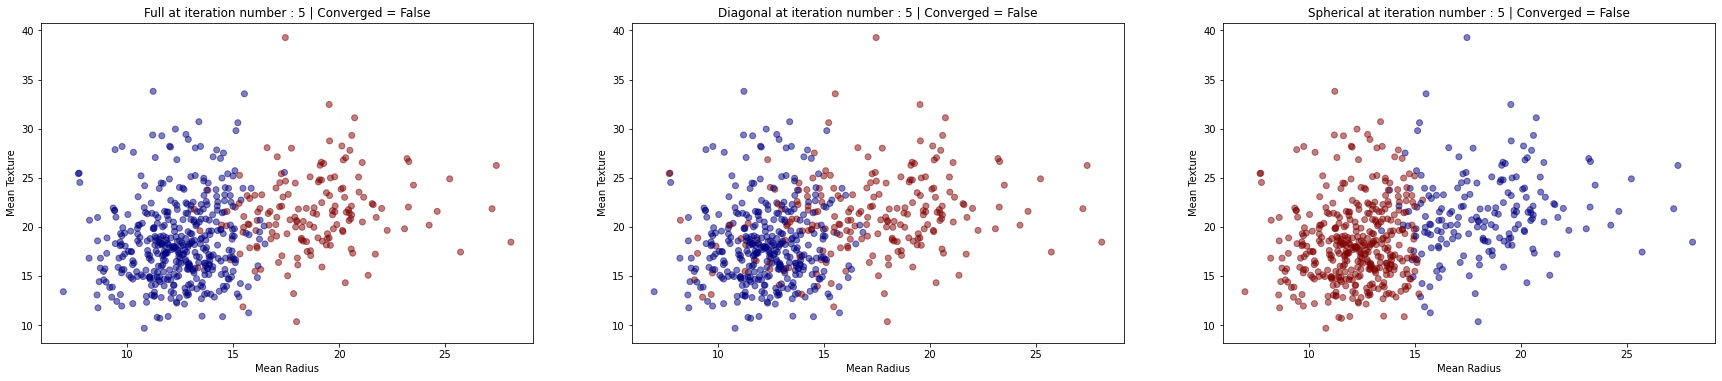

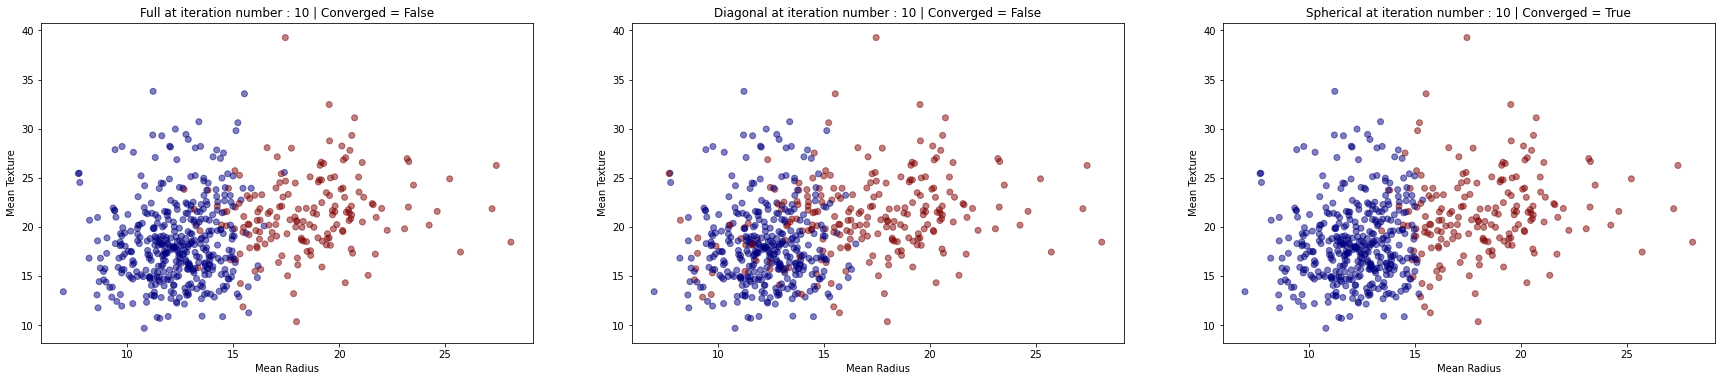

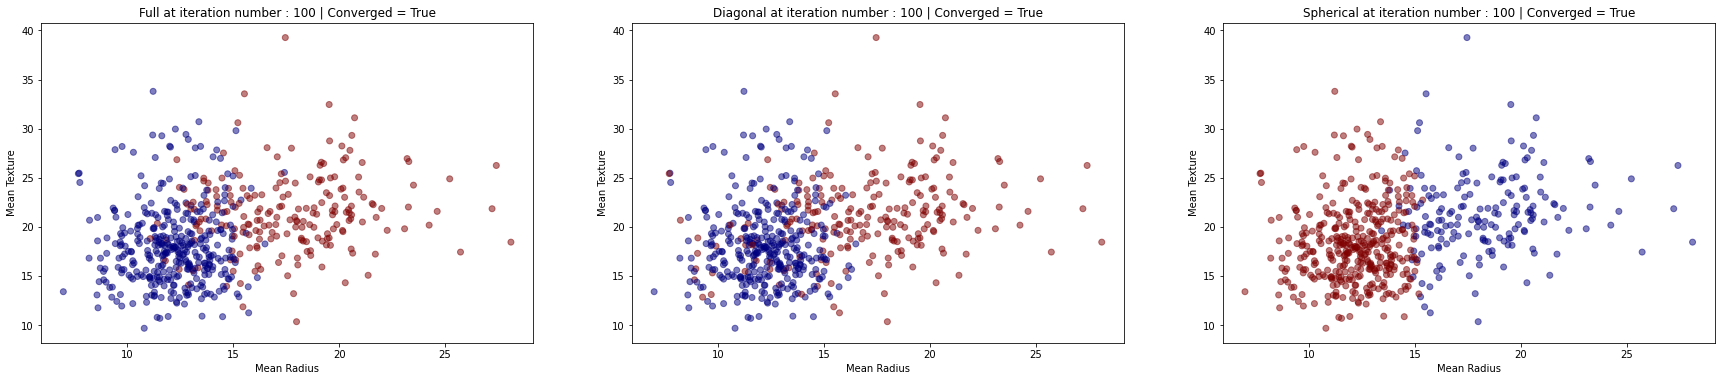

In [ ]:
max_iter = [5,10,100]
fignum = 331

for i in max_iter:
  gmm_full = GaussianMixture(n_components = 2, max_iter = i, covariance_type = "full").fit(X)
  gmm_diag = GaussianMixture(n_components = 2, max_iter = i, covariance_type = "diag").fit(X)
  gmm_spherical = GaussianMixture(n_components = 2, max_iter = i, covariance_type = "spherical").fit(X)
  ypred_full = gmm_full.predict(X)
  ypred_diag = gmm_diag.predict(X)
  ypred_spherical = gmm_spherical.predict(X)

  plt.figure(figsize=(30,20))
  plt.subplot(fignum)
  plt.scatter(X[:,0],X[:,1],  c=ypred_full, cmap = "jet",alpha=0.5)
  plt.xlabel('Mean Radius')
  plt.ylabel('Mean Texture')
  plt.title(f'Full at iteration number : {i} | Converged = {gmm_full.converged_}' )

  fignum += 1 

  plt.subplot(fignum)
  plt.scatter(X[:,0],X[:,1],  c=ypred_diag, cmap = "jet",alpha=0.5)
  plt.xlabel('Mean Radius')
  plt.ylabel('Mean Texture')
  plt.title(f'Diagonal at iteration number : {i} | Converged = {gmm_diag.converged_}')

  fignum += 1 

  plt.subplot(fignum)
  plt.scatter(X[:,0],X[:,1],  c=ypred_spherical, cmap = "jet",alpha=0.5)
  plt.xlabel('Mean Radius')
  plt.ylabel('Mean Texture')
  plt.title(f'Spherical at iteration number : {i} | Converged = {gmm_spherical.converged_}')

  fignum += 1 

In [ ]:
mean_0 = X[y==0].mean(axis=0)
mean_1 = X[y==1].mean(axis=0)
mean_for_both_classes = np.vstack((mean_0,mean_1))
print(mean_for_both_classes.shape)

(2, 30)


In [ ]:
estimators_gmm = [
    ("GMM_2", GaussianMixture(n_components = 2)),
    ("GMM_3", GaussianMixture(n_components = 3)),
    ("GMM_4", GaussianMixture(n_components = 4)),
    ("GMM_2_bad_init", GaussianMixture(n_components = 2,init_params='random')),
    ("GMM_2_bad_init_number_init_increased", GaussianMixture(n_components = 2,n_init=5,init_params='random',random_state=1)),
    ("GMM_2_changed_convergence_threshold", GaussianMixture(n_components = 2,tol = 0.01)),#1e-2
    ("GMM_2_max_iter_10", GaussianMixture(n_components = 2,max_iter = 10)),
    ("GMM_2_n_init_10", GaussianMixture(n_components = 2,n_init=10)),
    ("GMM_2_changing_mean", GaussianMixture(n_components = 2,means_init=mean_for_both_classes)),
    ("GMM_2_bad_init_changing_mean", GaussianMixture(n_components = 2,init_params='random',means_init=mean_for_both_classes))
]

In [ ]:
# method to make to store various metrics about model in a dictionary
models_gmm = {}
scaled_models_gmm = {}

def run_estimators_gmm(mode):
  score_metrics = {}
  if (mode == 'scaled'):
    estimators_gmm.pop()
    estimators_gmm.pop()
  for name,est in estimators_gmm:
    list=[]
    if (mode == 'normal'):
      labels = est.fit_predict(X)
    else:
      labels = est.fit_predict(X_scaled)

    list.append(str(est).split('e',1)[1])
    list.append(est.converged_)
    list.append(est.n_iter_)
    
    if ('2' in name):
      list.append((labels == y).sum())
    else:
      list.append('-')

    if (mode == 'normal'):
      models_gmm['ypred_'+name] =  labels
      list.append(np.round(metrics.calinski_harabasz_score(X, labels),4))
      list.append(np.round(metrics.silhouette_score(X, labels, metric='euclidean'),4))
      list.append(np.round(metrics.davies_bouldin_score(X, labels),4))
    else:
      scaled_models_gmm['ypred_'+name] =  labels
      list.append(np.round(metrics.calinski_harabasz_score(scaler.transform(X), labels),4))
      list.append(np.round(metrics.silhouette_score(X_scaled, labels, metric='euclidean'),4))
      list.append(np.round(metrics.davies_bouldin_score(X_scaled, labels),4))

    list.append(np.round(metrics.homogeneity_score(y, labels),4))
    list.append(np.round(metrics.completeness_score(y, labels),4))
    list.append(np.round(metrics.v_measure_score(y,labels),4))
    list.append(np.round(metrics.rand_score(labels,y),4))
    list.append(np.round(metrics.adjusted_rand_score(y,labels),4))
    list.append(np.round(metrics.fowlkes_mallows_score(y, labels),4))
    score_metrics[name] = list

  return score_metrics

In [ ]:
normal_metrics_gmm = run_estimators_gmm('normal')
scaled_metrics_gmm = run_estimators_gmm('scaled')

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


In [ ]:
columns_gmm_v = ['Parameters','Model Converged','Number of iterations','Number of correct labels predicted','Calinski Harbaz Score','Homogeneity Score','Completness Score','V measure Score','Rand Score','Adjusted Rand Score','Sillhouette Score','Davies Bouldin Score','Fowlkes Mallows Score']

In [ ]:
gmm_accuracy_normal = pd.DataFrame(normal_metrics_gmm,index=columns_gmm_v)
gmm_accuracy_normal.T.sort_values(['Adjusted Rand Score'])

Parameters  \
GMM_2_bad_init                                   (init_params='random', n_components=2)   
GMM_2_changed_convergence_threshold                          (n_components=2, tol=0.01)   
GMM_4                                                                  (n_components=4)   
GMM_2_max_iter_10                                         (max_iter=10, n_components=2)   
GMM_3                                                                  (n_components=3)   
GMM_2_bad_init_number_init_increased  (init_params='random', n_components=2, n_init=...   
GMM_2_bad_init_changing_mean          (init_params='random',\n                means_...   
GMM_2                                                                  (n_components=2)   
GMM_2_n_init_10                                             (n_components=2, n_init=10)   
GMM_2_changing_mean                   (means_init=array([[1.74628302e+01, 2.16049057...   

                                     Model Converged Number of iterations  \
GMM_2_bad_init                                  True                   51   
GMM_2_changed_convergence_threshold             True                    3   
GMM_4                                           True                   15   
GMM_2_max_iter_10                              False                   10   
GMM_3                                           True                   15   
GMM_2_bad_init_number_init_increased            True                   20   
GMM_2_bad_init_changing_mean                    True                   15   
GMM_2                                           True                   20   
GMM_2_n_init_10                                 True                   20   
GMM_2_changing_mean                             True                   14   

                                     Number of correct labels predicted  \
GMM_2_bad_init                                                      505   
GMM_2_changed_convergence_threshold                                 495   
GMM_4                                                                 -   
GMM_2_max_iter_10                                                    54   
GMM_3                                                                 -   
GMM_2_bad_init_number_init_increased                                 48   
GMM_2_bad_init_changing_mean                                        530   
GMM_2                                                                28   
GMM_2_n_init_10                                                      28   
GMM_2_changing_mean                                                 541   

                                     Calinski Harbaz Score Homogeneity Score  \
GMM_2_bad_init                                    369.1022            0.4191   
GMM_2_changed_convergence_threshold               1210.833            0.6811   
GMM_4                                             603.9944            0.4895   
GMM_2_max_iter_10                                1014.1811            0.6367   
GMM_3                                             827.6752            0.4963   
GMM_2_bad_init_number_init_increased              442.9056            0.4452   
GMM_2_bad_init_changing_mean                      467.8703            0.4698   
GMM_2                                             675.5659            0.5315   
GMM_2_n_init_10                                   675.5659            0.5315   
GMM_2_changing_mean                               675.5659            0.5315   

                                     Completness Score V measure Score  \
GMM_2_bad_init                                   0.921          0.4916   
GMM_2_changed_convergence_threshold             0.5277          0.4564   
GMM_4                                           0.5665          0.6445   
GMM_2_max_iter_10                               0.5812          0.5439   
GMM_3                                           0.6835          0.6445   
GMM_2_bad_init_number_init_increased            0.8447           0.582   
GM

In [ ]:
gmm_accuracy_scaled = pd.DataFrame(scaled_metrics_gmm,index=columns_gmm_v)
gmm_accuracy_scaled.T.sort_values(['Adjusted Rand Score'])

Parameters  \
GMM_2_bad_init                                   (init_params='random', n_components=2)   
GMM_4                                                                  (n_components=4)   
GMM_3                                                                  (n_components=3)   
GMM_2_bad_init_number_init_increased  (init_params='random', n_components=2, n_init=...   
GMM_2                                                                  (n_components=2)   
GMM_2_changed_convergence_threshold                          (n_components=2, tol=0.01)   
GMM_2_max_iter_10                                         (max_iter=10, n_components=2)   
GMM_2_n_init_10                                             (n_components=2, n_init=10)   

                                     Model Converged Number of iterations  \
GMM_2_bad_init                                  True                   44   
GMM_4                                           True                   18   
GMM_3                                           True                   19   
GMM_2_bad_init_number_init_increased            True                   23   
GMM_2                                           True                    8   
GMM_2_changed_convergence_threshold             True                    8   
GMM_2_max_iter_10                               True                    8   
GMM_2_n_init_10                                 True                    9   

                                     Number of correct labels predicted  \
GMM_2_bad_init                                                       97   
GMM_4                                                                 -   
GMM_3                                                                 -   
GMM_2_bad_init_number_init_increased                                 46   
GMM_2                                                               535   
GMM_2_changed_convergence_threshold                                  34   
GMM_2_max_iter_10                                                    34   
GMM_2_n_init_10                                                     535   

                                     Calinski Harbaz Score Homogeneity Score  \
GMM_2_bad_init                                    159.7847            0.2631   
GMM_4                                             132.6873            0.1946   
GMM_3                                             171.7634            0.2515   
GMM_2_bad_init_number_init_increased              205.9484            0.2848   
GMM_2                                             247.2835            0.3145   
GMM_2_changed_convergence_threshold               247.2835            0.3145   
GMM_2_max_iter_10                                 247.2835            0.3145   
GMM_2_n_init_10                                   247.2835            0.3145   

                                     Completness Score V measure Score  \
GMM_2_bad_init                                  1.7226          0.3302   
GMM_4                                           1.8385          0.7148   
GMM_3                                           1.7297          0.6498   
GMM_2_bad_init_number_init_increased            1.4962           0.595   
GMM_2                                            1.377           0.662   
GMM_2_changed_convergence_threshold              1.377           0.662   
GMM_2_max_iter_10                                1.377           0.662   
GMM_2_n_init_10                                  1.377           0.662   

                                     Rand Score Adjusted Rand Score  \
GMM_2_bad_init                           0.3235              0.3268   
GMM_4                                    0.3891              0.5039   
GMM_3                                    0.4327              0.5195   
GMM_2_bad_init_number_init_increased     0.5835              0.5892   
GMM_2                                    0.6602              0.6611   
GMM_2_changed_convergence_threshold      0.6602              0.6611   
GM

# Agglomerative Clustering


In [ ]:
#For Agglomerative Model we have refrenced -  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [ ]:
agg_ward = AgglomerativeClustering(n_clusters = 2, linkage = "ward",compute_distances=True)
agg_complete = AgglomerativeClustering(n_clusters = 2, linkage = "complete",compute_distances=True)
agg_average = AgglomerativeClustering(n_clusters = 2, linkage = "average",compute_distances=True)
agg_single = AgglomerativeClustering(n_clusters = 2, linkage = "single",compute_distances=True)


ypred_ward = agg_ward.fit_predict(X)
ypred_complete = agg_complete.fit_predict(X)
ypred_average = agg_average.fit_predict(X)
ypred_single = agg_single.fit_predict(X)

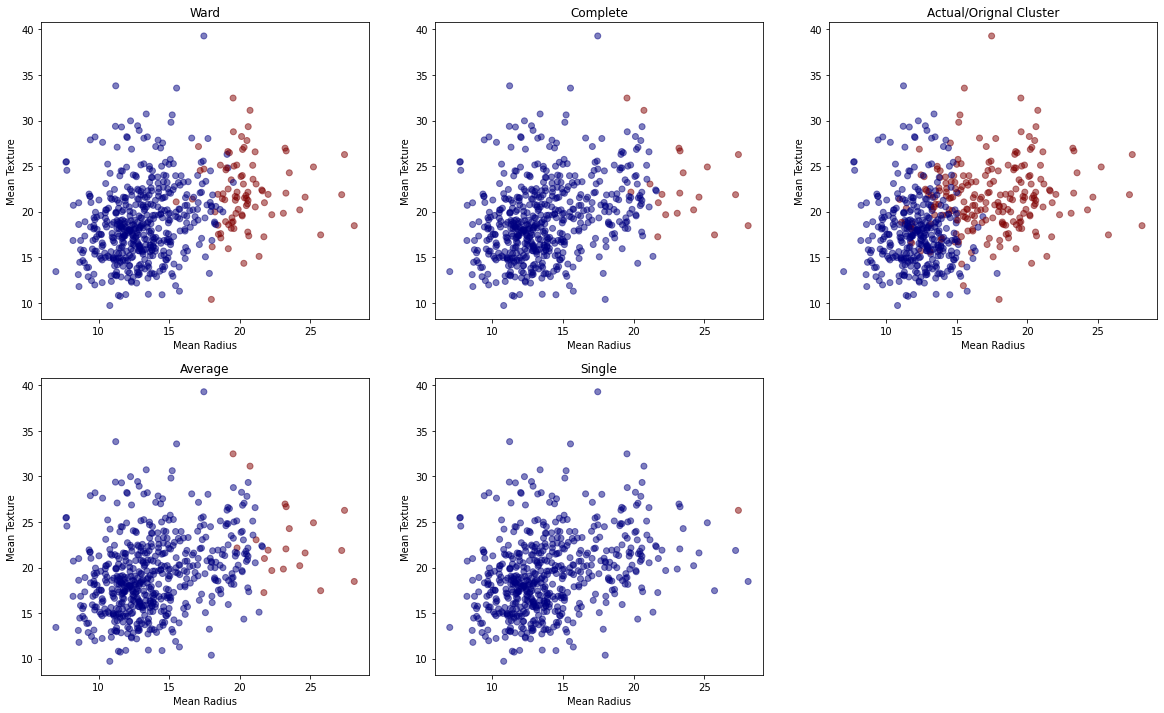

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(231)
plt.scatter(X[:,0],X[:,1],  c=ypred_ward, cmap = "jet",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Ward')

plt.subplot(232)
plt.scatter(X[:,0],X[:,1],  c=ypred_complete, cmap = "jet_r",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Complete')

plt.subplot(234)
plt.scatter(X[:,0],X[:,1],  c=ypred_average, cmap = "jet_r",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Average')

plt.subplot(235)
plt.scatter(X[:,0],X[:,1],  c=ypred_single, cmap = "jet",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Single')

plt.subplot(233)
plt.scatter(X[:,0],X[:,1],  c=y, cmap = "jet_r",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Actual/Orignal Cluster')
plt.show()

In [ ]:
model_dict={'Ward':ypred_ward,'Complete':ypred_complete,'Average':ypred_average,'Single':ypred_single}

In [ ]:
score = {}
for model,pred in model_dict.items():
  list=[]
  list.append((pred == y).sum())
  list.append(np.round(metrics.calinski_harabasz_score(X, pred),4))
  list.append(np.round(metrics.homogeneity_score(y, pred),4))
  list.append(np.round(metrics.completeness_score(y, pred),4))
  list.append(np.round(metrics.v_measure_score(y,pred),4))
  list.append(np.round(metrics.rand_score(y,pred),4))
  list.append(np.round(metrics.adjusted_rand_score(y,pred),4))
  list.append(np.round(metrics.silhouette_score(X, pred, metric='euclidean'),4))
  list.append(np.round(metrics.davies_bouldin_score(X, pred),4))
  list.append(np.round(metrics.fowlkes_mallows_score(y, pred),4))
  score[model] = list

In [ ]:
columns_agg=['Correct Predictions','Calinski Harbaz Score','Homogeneity Score','Completness Score','V measure Score','Rand Score','Adjusted Rand Score','Sillhouette Score','Davies Bouldin Score','Fowlkes Mallows Score']

In [ ]:
agg_acuracy_different_linkage = pd.DataFrame(score,index=columns_agg)
agg_acuracy_different_linkage.T.sort_values(['Adjusted Rand Score'])

Correct Predictions  Calinski Harbaz Score  Homogeneity Score  \
Single                  211.0                35.4336             0.0026   
Complete                377.0               334.3356             0.0542   
Average                 377.0               334.3356             0.0542   
Ward                    126.0              1088.1624             0.2622   

          Completness Score  V measure Score  Rand Score  Adjusted Rand Score  \
Single               0.1347           0.0052      0.5326               0.0024   
Complete             0.2351           0.0881      0.5521               0.0523   
Average              0.2351           0.0881      0.5521               0.0523   
Ward                 0.4076           0.3191      0.6546               0.2872   

          Sillhouette Score  Davies Bouldin Score  Fowlkes Mallows Score  
Single               0.7990                0.1282                 0.7286  
Complete             0.6909                0.4290                 0.7215  
Average              0.6909                0.4290                 0.7215  
Ward                 0.6900                0.4795                 0.7392

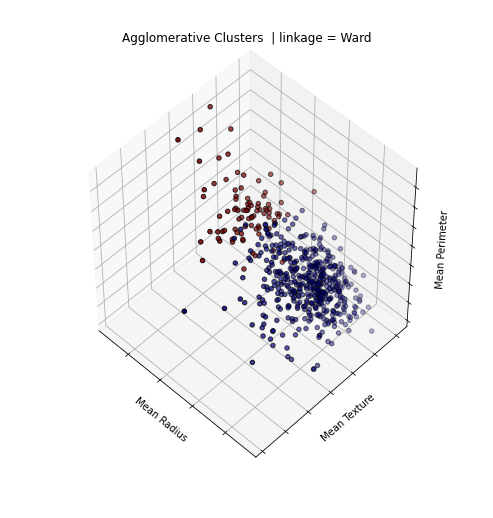

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=ypred_ward, cmap='jet', edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Mean Radius")
ax.set_ylabel("Mean Texture")
ax.set_zlabel("Mean Perimeter")
ax.set_title('Agglomerative Clusters  | linkage = Ward')
ax.dist=12

In [ ]:
estimators_agg = [
    ("AGG_2", AgglomerativeClustering(n_clusters = 2,compute_distances = True)),
    ("AGG_3", AgglomerativeClustering(n_clusters = 3,compute_distances = True)),
    ("AGG_4", AgglomerativeClustering(n_clusters = 4,compute_distances = True)),
    ("AGG_5", AgglomerativeClustering(n_clusters = 5,compute_distances = True)),
    ("AGG_2_cosine", AgglomerativeClustering(n_clusters = 2,linkage='complete',affinity='cosine',compute_distances = True)),
    ("AGG_2_l1", AgglomerativeClustering(n_clusters = 2,linkage='complete',affinity='l1',compute_distances = True)),
    ("AGG_2_l2", AgglomerativeClustering(n_clusters = 2,linkage='complete',affinity='l2',compute_distances = True)),
]

In [ ]:
# method to make to store various metrics about model in a dictionary
models_agg = {}
scaled_models_agg = {}

def run_estimators_agg(mode):
  score_metrics = {}
  for name,est in estimators_agg:
    list=[]
    if (mode == 'normal'):
      labels = est.fit_predict(X)
    else:
      labels = est.fit_predict(X_scaled)

    list.append(str(est).split('g',3)[3])
    
    if ('2' in name):
      list.append((labels == y).sum())
    else:
      list.append('-')

    if (mode == 'normal'):
      models_agg['ypred_'+name] =  labels
      list.append(np.round(metrics.calinski_harabasz_score(X, labels),4))
      list.append(np.round(metrics.silhouette_score(X, labels, metric='euclidean'),4))
      list.append(np.round(metrics.davies_bouldin_score(X, labels),4))
    else:
      scaled_models_agg['ypred_'+name] =  labels
      list.append(np.round(metrics.calinski_harabasz_score(X_scaled, labels),4))
      list.append(np.round(metrics.silhouette_score(X_scaled, labels, metric='euclidean'),4))
      list.append(np.round(metrics.davies_bouldin_score(X_scaled, labels),4))

    list.append(np.round(metrics.homogeneity_score(y, labels),4))
    list.append(np.round(metrics.completeness_score(y, labels),4))
    list.append(np.round(metrics.v_measure_score(y,labels),4))
    list.append(np.round(metrics.rand_score(labels,y),4))
    list.append(np.round(metrics.adjusted_rand_score(y,labels),4))
    list.append(np.round(metrics.fowlkes_mallows_score(y, labels),4))
    score_metrics[name] = list

  return score_metrics

In [ ]:
columns_agg_v = ['Parameters','Number of correct labels predicted','Calinski Harbaz Score','Homogeneity Score','Completness Score','V measure Score','Rand Score','Adjusted Rand Score','Sillhouette Score','Davies Bouldin Score','Fowlkes Mallows Score']

In [ ]:
normal_metrics_agg = run_estimators_agg('normal')
scaled_metrics_agg = run_estimators_agg('scaled')

In [ ]:
agg_accuracy_normal = pd.DataFrame(normal_metrics_agg,index=columns_agg_v)
agg_accuracy_normal.T.sort_values(['Adjusted Rand Score'])

Parameters  \
AGG_2_l1      (affinity='l1', compute_distances=True,\n     ...   
AGG_2_l2      (affinity='l2', compute_distances=True,\n     ...   
AGG_2_cosine  (affinity='cosine', compute_distances=True,\n ...   
AGG_2                                  (compute_distances=True)   
AGG_4                    (compute_distances=True, n_clusters=4)   
AGG_3                    (compute_distances=True, n_clusters=3)   
AGG_5                    (compute_distances=True, n_clusters=5)   

             Number of correct labels predicted Calinski Harbaz Score  \
AGG_2_l1                                    377              334.3356   
AGG_2_l2                                    377              334.3356   
AGG_2_cosine                                168              181.4638   
AGG_2                                       126             1088.1624   
AGG_4                                         -             1245.5676   
AGG_3                                         -             1089.9294   
AGG_5                                         -             1541.8595   

             Homogeneity Score Completness Score V measure Score Rand Score  \
AGG_2_l1                0.6909             0.429          0.0542     0.2351   
AGG_2_l2                0.6909             0.429          0.0542     0.2351   
AGG_2_cosine            0.4988            0.8955          0.1241      0.301   
AGG_2                     0.69            0.4795          0.2622     0.4076   
AGG_4                    0.509            0.6091          0.5266      0.326   
AGG_3                   0.5083            0.6314          0.5266     0.3447   
AGG_5                   0.5114            0.6114          0.6237     0.3202   

             Adjusted Rand Score Sillhouette Score Davies Bouldin Score  \
AGG_2_l1                  0.0881            0.5521               0.0523   
AGG_2_l2                  0.0881            0.5521               0.0523   
AGG_2_cosine              0.1757            0.5831               0.1267   
AGG_2                     0.3191            0.6546               0.2872   
AGG_4                     0.4027            0.6856               0.3806   
AGG_3                     0.4167            0.6907               0.3903   
AGG_5                     0.4232            0.6965               0.4063   

             Fowlkes Mallows Score  
AGG_2_l1                    0.7215  
AGG_2_l2                    0.7215  
AGG_2_cosine                0.7198  
AGG_2                       0.7392  
AGG_4                       0.6646  
AGG_3                       0.6714  
AGG_5                       0.6652

Text(0.5, 1.0, 'Actual/orignal Clusters')

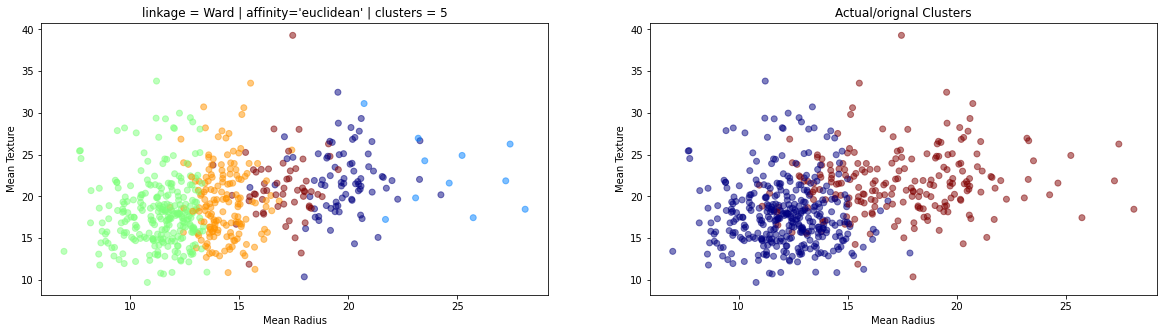

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.scatter(X[:,0],X[:,1],  c=models_agg['ypred_AGG_5'], cmap = "jet",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('linkage = Ward | affinity=\'euclidean\' | clusters = 5')

plt.subplot(122)
plt.scatter(X[:,0],X[:,1],  c=y, cmap = "jet_r",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Actual/orignal Clusters')


In [ ]:
agg_accuracy_scaled = pd.DataFrame(scaled_metrics_agg,index=columns_agg_v)
agg_accuracy_scaled.T.sort_values(['Adjusted Rand Score'])

Parameters  \
AGG_2_l2      (affinity='l2', compute_distances=True,\n     ...   
AGG_5                    (compute_distances=True, n_clusters=5)   
AGG_3                    (compute_distances=True, n_clusters=3)   
AGG_2                                  (compute_distances=True)   
AGG_2_l1      (affinity='l1', compute_distances=True,\n     ...   
AGG_4                    (compute_distances=True, n_clusters=4)   
AGG_2_cosine  (affinity='cosine', compute_distances=True,\n ...   

             Number of correct labels predicted Calinski Harbaz Score  \
AGG_2_l2                                    210               27.8727   
AGG_5                                         -               116.735   
AGG_3                                         -              182.1739   
AGG_2                                       501              248.6288   
AGG_2_l1                                     73               224.997   
AGG_4                                         -              138.0905   
AGG_2_cosine                                 47              245.4638   

             Homogeneity Score Completness Score V measure Score Rand Score  \
AGG_2_l2                0.6607            0.4497          0.0053     0.1489   
AGG_5                   0.2434            1.6247          0.5547     0.3499   
AGG_3                   0.3301            1.5564           0.504     0.3946   
AGG_2                   0.3394              1.37          0.4462     0.4681   
AGG_2_l1                0.3313            1.3428          0.4347     0.4873   
AGG_4                   0.2982            1.4848          0.5547     0.4039   
AGG_2_cosine            0.3344            1.3086          0.5967     0.6477   

             Adjusted Rand Score Sillhouette Score Davies Bouldin Score  \
AGG_2_l2                  0.0102            0.5335               0.0048   
AGG_5                     0.4291            0.7515               0.5038   
AGG_3                     0.4427            0.7685               0.5363   
AGG_2                     0.4569            0.7892                0.575   
AGG_2_l1                  0.4595            0.7759               0.5461   
AGG_4                     0.4674            0.7719               0.5434   
AGG_2_cosine              0.6211            0.8482               0.6932   

             Fowlkes Mallows Score  
AGG_2_l2                    0.7281  
AGG_5                       0.7568  
AGG_3                       0.7785  
AGG_2                       0.8075  
AGG_2_l1                    0.8034  
AGG_4                       0.7807  
AGG_2_cosine                0.8645

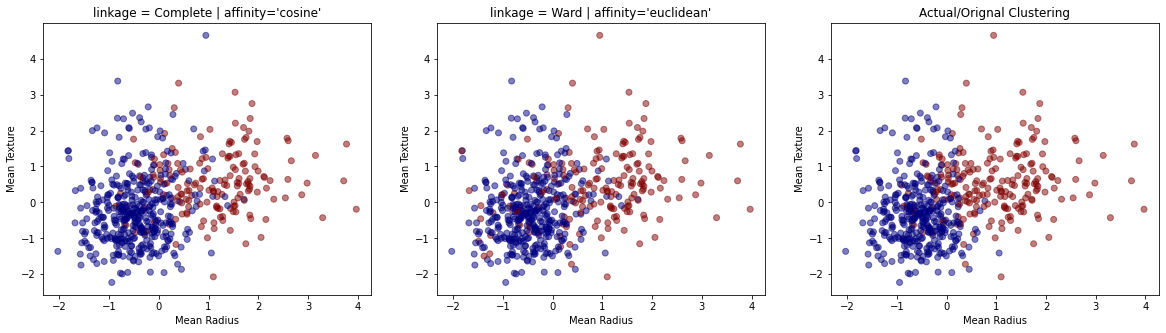

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=scaled_models_agg['ypred_AGG_2_cosine'], cmap = "jet",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('linkage = Complete | affinity=\'cosine\'')

plt.subplot(132)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=scaled_models_agg['ypred_AGG_2'], cmap = "jet_r",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('linkage = Ward | affinity=\'euclidean\'')

plt.subplot(133)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=y, cmap = "jet_r",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Actual/Orignal Clustering')

plt.show()

# BIRCH Clustering

In [ ]:
# For BIRCH model we have refrenced - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html#sklearn.cluster.Birch

In [ ]:
birch = Birch(n_clusters = 2)

In [ ]:
ypred_birch_normal = birch.fit_predict(X)
ypred_birch_scaled =  birch.fit_predict(X_scaled)

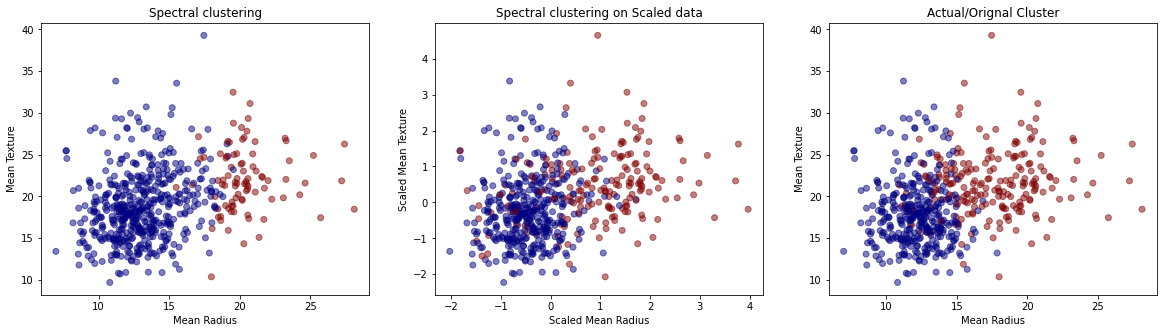

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],  c=ypred_birch_normal, cmap = "jet",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Spectral clustering')

plt.subplot(132)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=ypred_birch_scaled, cmap = "jet_r",alpha=0.5)
plt.xlabel('Scaled Mean Radius')
plt.ylabel('Scaled Mean Texture')
plt.title('Spectral clustering on Scaled data')


plt.subplot(133)
plt.scatter(X[:,0],X[:,1],  c=y, cmap = "jet_r",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Actual/Orignal Cluster')
plt.show()

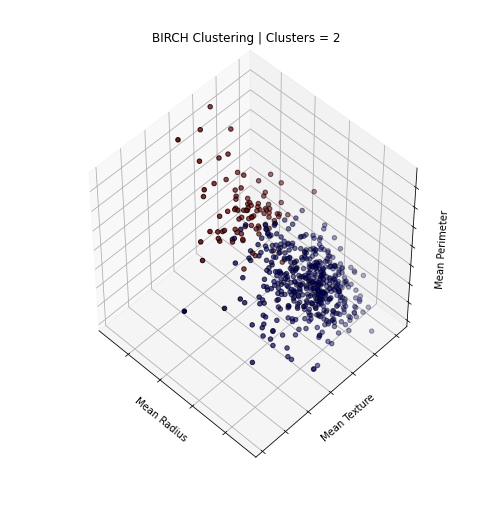

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=ypred_birch_normal, cmap='jet', edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Mean Radius")
ax.set_ylabel("Mean Texture")
ax.set_zlabel("Mean Perimeter")
ax.set_title('BIRCH Clustering | Clusters = 2')
ax.dist=12

In [ ]:
print(f"Rand Score          ==> with normal data : {(np.round(metrics.rand_score(ypred_birch_normal,y),4))} and when data is scaled : {(np.round(metrics.rand_score(ypred_birch_scaled,y),4))} ")
print(f"Adjusted Rand Score ==> with normal data : {(np.round(metrics.adjusted_rand_score(ypred_birch_normal,y),4))} and when data is scaled : {(np.round(metrics.adjusted_rand_score(ypred_birch_scaled,y),4))} ")
print(f"V Measure Score     ==> with normal data : {(np.round(metrics.v_measure_score(ypred_birch_normal,y),4))} and when data is scaled : {(np.round(metrics.v_measure_score(ypred_birch_scaled,y),4))} ")
print(f"Homogeneity Score   ==> with normal data : {(np.round(metrics.homogeneity_score(ypred_birch_normal,y),4))} and when data is scaled : {(np.round(metrics.homogeneity_score(ypred_birch_scaled,y),4))} ")
print(f"Completeness Score  ==> with normal data : {(np.round(metrics.completeness_score(ypred_birch_normal,y),4))} and when data is scaled : {(np.round(metrics.completeness_score(ypred_birch_scaled,y),4))} ")


Rand Score          ==> with normal data : 0.6546 and when data is scaled : 0.7892 
Adjusted Rand Score ==> with normal data : 0.2872 and when data is scaled : 0.575 
V Measure Score     ==> with normal data : 0.3191 and when data is scaled : 0.4569 
Homogeneity Score   ==> with normal data : 0.4076 and when data is scaled : 0.4681 
Completeness Score  ==> with normal data : 0.2622 and when data is scaled : 0.4462 


In [ ]:
estimators_birch = [
    ("birch_2", Birch(n_clusters = 2)),
    ("birch_3", Birch(n_clusters = 3)),
    ("birch_4", Birch(n_clusters = 4)),
    ("birch_2_bf", Birch(n_clusters = 2,branching_factor=10)),
    ("birch_2_threshold", Birch(n_clusters = 2,threshold=0.1))
]

In [ ]:
# method to make to store various metrics about model in a dictionary
models_birch = {}
scaled_models_birch = {}

def run_estimators_birch(mode):
  score_metrics = {}
  for name,est in estimators_birch:
    list=[]
    if (mode == 'normal'):
      labels = est.fit_predict(X)
    else:
      labels = est.fit_predict(X_scaled)

    list.append(str(est).split('h',1)[1])
    
    if ('2' in name):
      list.append((labels == y).sum())
    else:
      list.append('-')

    if (mode == 'normal'):
      models_birch['ypred_'+name] =  labels
      list.append(np.round(metrics.calinski_harabasz_score(X, labels),4))
      list.append(np.round(metrics.silhouette_score(X, labels, metric='euclidean'),4))
      list.append(np.round(metrics.davies_bouldin_score(X, labels),4))
    else:
      scaled_models_birch['ypred_'+name] =  labels
      list.append(np.round(metrics.calinski_harabasz_score(X_scaled, labels),4))
      list.append(np.round(metrics.silhouette_score(X_scaled, labels, metric='euclidean'),4))
      list.append(np.round(metrics.davies_bouldin_score(X_scaled, labels),4))

    list.append(np.round(metrics.homogeneity_score(y, labels),4))
    list.append(np.round(metrics.completeness_score(y, labels),4))
    list.append(np.round(metrics.v_measure_score(y,labels),4))
    list.append(np.round(metrics.rand_score(labels,y),4))
    list.append(np.round(metrics.adjusted_rand_score(y,labels),4))
    list.append(np.round(metrics.fowlkes_mallows_score(y, labels),4))
    score_metrics[name] = list

  return score_metrics

In [ ]:
columns_birch = ['Parameters','Number of correct labels predicted','Calinski Harbaz Score','Homogeneity Score','Completness Score','V measure Score','Rand Score','Adjusted Rand Score','Sillhouette Score','Davies Bouldin Score','Fowlkes Mallows Score']

In [ ]:
normal_metrics_birch = run_estimators_birch('normal')
scaled_metrics_birch = run_estimators_birch('scaled')

In [ ]:
birch_accuracy_normal = pd.DataFrame(normal_metrics_birch,index=columns_birch)
birch_accuracy_normal.T.sort_values(['Adjusted Rand Score'])

Parameters  \
birch_2                                 (n_clusters=2)   
birch_2_bf         (branching_factor=10, n_clusters=2)   
birch_2_threshold        (n_clusters=2, threshold=0.1)   
birch_4                                 (n_clusters=4)   
birch_3                                             ()   

                  Number of correct labels predicted Calinski Harbaz Score  \
birch_2                                          126             1088.1624   
birch_2_bf                                       126             1088.1624   
birch_2_threshold                                126             1088.1624   
birch_4                                            -             1245.5676   
birch_3                                            -             1089.9294   

                  Homogeneity Score Completness Score V measure Score  \
birch_2                        0.69            0.4795          0.2622   
birch_2_bf                     0.69            0.4795          0.2622   
birch_2_threshold              0.69            0.4795          0.2622   
birch_4                       0.509            0.6091          0.5266   
birch_3                      0.5083            0.6314          0.5266   

                  Rand Score Adjusted Rand Score Sillhouette Score  \
birch_2               0.4076              0.3191            0.6546   
birch_2_bf            0.4076              0.3191            0.6546   
birch_2_threshold     0.4076              0.3191            0.6546   
birch_4                0.326              0.4027            0.6856   
birch_3               0.3447              0.4167            0.6907   

                  Davies Bouldin Score Fowlkes Mallows Score  
birch_2                         0.2872                0.7392  
birch_2_bf                      0.2872                0.7392  
birch_2_threshold               0.2872                0.7392  
birch_4                         0.3806                0.6646  
birch_3                         0.3903                0.6714

In [ ]:
birch_accuracy_scaled = pd.DataFrame(scaled_metrics_birch,index=columns_birch)
birch_accuracy_scaled.T.sort_values(['Adjusted Rand Score'])

Parameters  \
birch_3                                             ()   
birch_2                                 (n_clusters=2)   
birch_2_bf         (branching_factor=10, n_clusters=2)   
birch_2_threshold        (n_clusters=2, threshold=0.1)   
birch_4                                 (n_clusters=4)   

                  Number of correct labels predicted Calinski Harbaz Score  \
birch_3                                            -              182.1739   
birch_2                                          501              248.6288   
birch_2_bf                                       501              248.6288   
birch_2_threshold                                501              248.6288   
birch_4                                            -              138.0905   

                  Homogeneity Score Completness Score V measure Score  \
birch_3                      0.3301            1.5564           0.504   
birch_2                      0.3394              1.37          0.4462   
birch_2_bf                   0.3394              1.37          0.4462   
birch_2_threshold            0.3394              1.37          0.4462   
birch_4                      0.2982            1.4848          0.5547   

                  Rand Score Adjusted Rand Score Sillhouette Score  \
birch_3               0.3946              0.4427            0.7685   
birch_2               0.4681              0.4569            0.7892   
birch_2_bf            0.4681              0.4569            0.7892   
birch_2_threshold     0.4681              0.4569            0.7892   
birch_4               0.4039              0.4674            0.7719   

                  Davies Bouldin Score Fowlkes Mallows Score  
birch_3                         0.5363                0.7785  
birch_2                          0.575                0.8075  
birch_2_bf                       0.575                0.8075  
birch_2_threshold                0.575                0.8075  
birch_4                         0.5434                0.7807

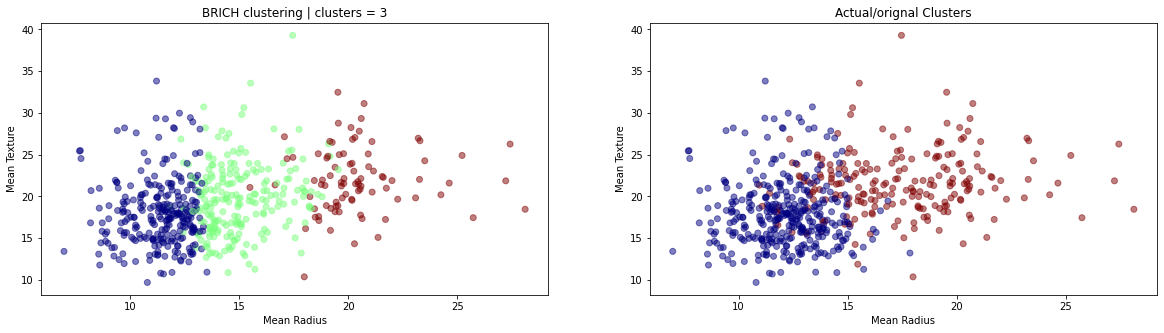

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.scatter(X[:,0],X[:,1],  c=models_birch['ypred_birch_3'], cmap = "jet_r",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('BRICH clustering | clusters = 3')

plt.subplot(122)
plt.scatter(X[:,0],X[:,1],  c=y, cmap = "jet_r",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Actual/orignal Clusters')
plt.show()

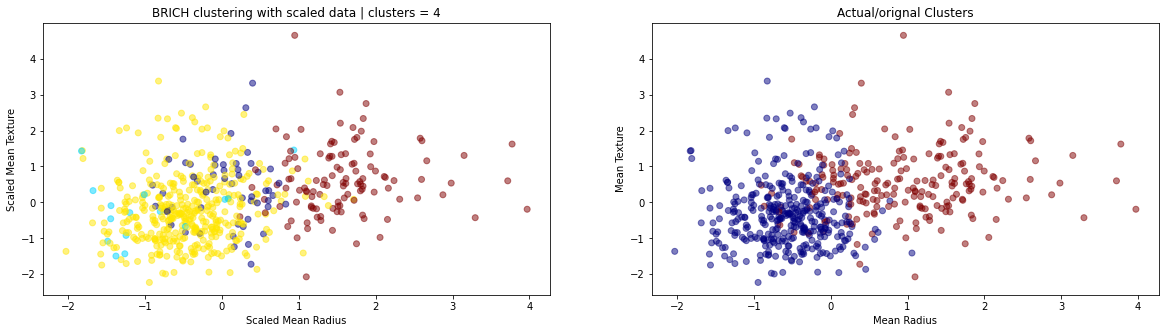

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=scaled_models_birch['ypred_birch_4'], cmap = "jet_r",alpha=0.5)
plt.xlabel('Scaled Mean Radius')
plt.ylabel('Scaled Mean Texture')
plt.title('BRICH clustering with scaled data | clusters = 4')

plt.subplot(122)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=y, cmap = "jet_r",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Actual/orignal Clusters')
plt.show()

# Spectral Clustering

In [ ]:
# For Spectral model we have refrenced - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering

In [ ]:
spec = SpectralClustering(n_clusters = 2, gamma=1, degree = 3, kernel_params=None, n_neighbors=10,n_init=10,affinity='rbf',eigen_solver=None)

In [ ]:
ypred_spec_normal = spec.fit_predict(X)
ypred_spec_scaled = spec.fit_predict(X_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.p

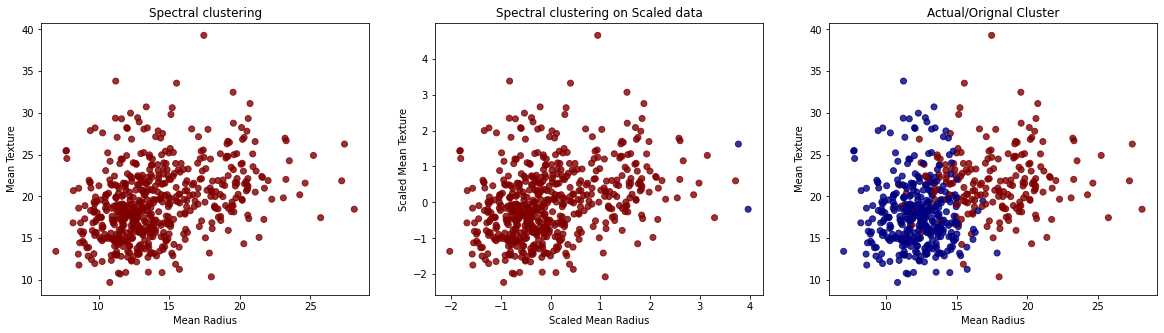

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],  c=ypred_spec_normal, cmap = "jet_r",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Spectral clustering')

plt.subplot(132)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=ypred_spec_scaled, cmap = "jet_r",alpha=0.8)
plt.xlabel('Scaled Mean Radius')
plt.ylabel('Scaled Mean Texture')
plt.title('Spectral clustering on Scaled data')

plt.subplot(133)
plt.scatter(X[:,0],X[:,1],  c=y, cmap = "jet_r",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Actual/Orignal Cluster')
plt.show()

In [ ]:
estimators_spec = [
    ("SC_2_lobpcg", SpectralClustering(n_clusters = 2,eigen_solver="lobpcg")),
    ("SC_2_arpack", SpectralClustering(n_clusters = 2,eigen_solver="arpack")),
    ("SC_2_affinity", SpectralClustering(n_clusters = 2,affinity="nearest_neighbors")),
    ("SC_2_eigen_affinity", SpectralClustering(n_clusters = 2,eigen_solver="lobpcg", affinity="nearest_neighbors")),
    ("SC_2_components", SpectralClustering(n_clusters = 2,n_components=3)), 
    ("SC_2_neighbours", SpectralClustering(n_clusters = 2,n_neighbors=5)),
    ("SC_2_gamma_0_5", SpectralClustering(n_clusters = 2,gamma=0.5)),
    ("SC_2_gamma_2", SpectralClustering(n_clusters = 2,gamma=2)), 
    ("SC_2_gamma_affinity", SpectralClustering(n_clusters = 2,gamma=0.5,affinity="nearest_neighbors")),
    ("SC_3", SpectralClustering(n_clusters = 3)),
    ("SC_3_eigen_affinity", SpectralClustering(n_clusters = 3,eigen_solver="arpack", affinity="nearest_neighbors"))
]

In [ ]:
score_metrics={}
models_spec = {}
for mode in (['normal','scaled']):
  for name,est in estimators_spec:
    if mode == 'scaled':
      labels = est.fit_predict(X_scaled)
      models_spec['ypred_'+name+'_scaled'] = labels
    else:
      labels = est.fit_predict(X)
      models_spec['ypred_'+name+'_normal'] = labels
    
    list=[]
    if ('2' in name):
      list.append((labels == y).sum())
    else:
      list.append('-')
    list.append(np.round(metrics.rand_score(labels, y),4))
    list.append(np.round(metrics.adjusted_rand_score(y,labels),4))
    score_metrics[name+'_'+mode] = list

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.p

In [ ]:
columns_spec_interm = ['Correct predictions','Rand Score','Adjusted Rand Score']

In [ ]:
spec_accuracy_interm = pd.DataFrame(score_metrics,index=columns_spec_interm)
spec_accuracy_interm.T.sort_values(['Adjusted Rand Score'])

Correct predictions Rand Score Adjusted Rand Score
SC_2_gamma_2_scaled                      213.0     0.5308             -0.0014
SC_2_lobpcg_scaled                       213.0     0.5308             -0.0014
SC_2_lobpcg_normal                       212.0     0.5316                 0.0
SC_2_arpack_normal                       212.0     0.5316                 0.0
SC_2_components_normal                   212.0     0.5316                 0.0
SC_2_neighbours_normal                   212.0     0.5316                 0.0
SC_2_gamma_2_normal                      212.0     0.5316                 0.0
SC_3_normal                                  -     0.5316                 0.0
SC_3_scaled                                  -     0.5326              0.0034
SC_2_gamma_0_5_scaled                    210.0     0.5335              0.0048
SC_2_gamma_0_5_normal                    210.0     0.5335              0.0048
SC_2_neighbours_scaled                   210.0     0.5335              0.0048
SC_2_arpack_scaled                       210.0     0.5335              0.0048
SC_2_components_scaled                   210.0     0.5335              0.0048
SC_3_eigen_affinity_normal                   -     0.6351              0.2816
SC_2_gamma_affinity_normal               100.0     0.7098              0.4195
SC_2_eigen_affinity_normal               469.0     0.7098              0.4195
SC_2_affinity_normal                     100.0     0.7098              0.4195
SC_3_eigen_affinity_scaled                   -     0.7594              0.5236
SC_2_affinity_scaled                      36.0     0.8813              0.7608
SC_2_gamma_affinity_scaled               533.0     0.8813              0.7608
SC_2_eigen_affinity_scaled                36.0     0.8813              0.7608

In [ ]:
best_models_spec = ['SC_2_eigen_affinity_normal','SC_2_affinity_scaled','SC_3_eigen_affinity_scaled','SC_2_eigen_affinity_scaled','SC_2_affinity_normal','SC_2_gamma_affinity_scaled']

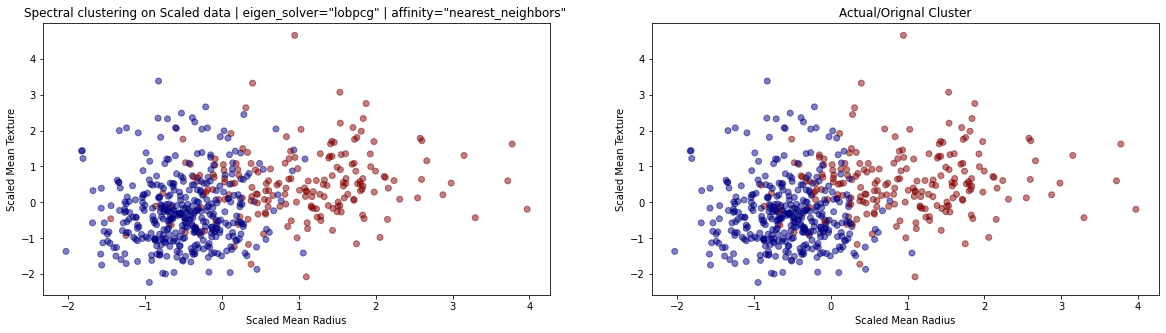

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=models_spec['ypred_SC_2_eigen_affinity_scaled'], cmap = "jet",alpha=0.5)
plt.xlabel('Scaled Mean Radius')
plt.ylabel('Scaled Mean Texture')
plt.title('Spectral clustering on Scaled data | eigen_solver=\"lobpcg\" | affinity=\"nearest_neighbors\" ')

plt.subplot(122)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=y, cmap = "jet_r",alpha=0.5)
plt.xlabel('Scaled Mean Radius')
plt.ylabel('Scaled Mean Texture')
plt.title('Actual/Orignal Cluster')
plt.show()

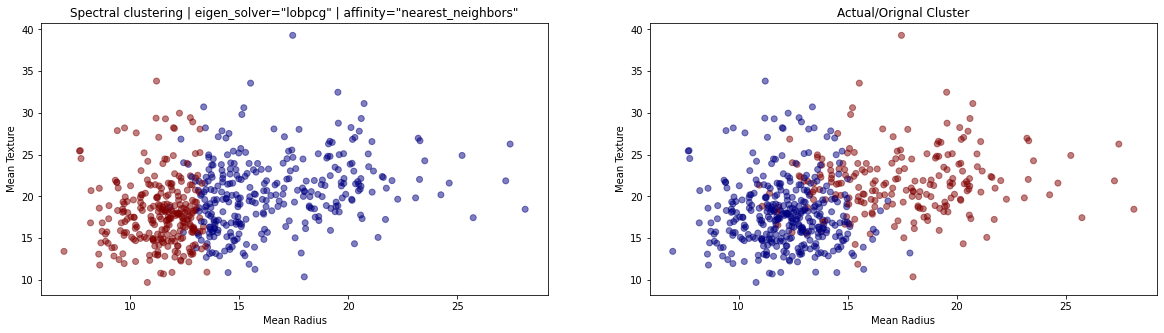

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1],  c=models_spec['ypred_SC_2_eigen_affinity_normal'], cmap = "jet",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Spectral clustering | eigen_solver=\"lobpcg\" | affinity=\"nearest_neighbors\"')


plt.subplot(122)
plt.scatter(X[:,0],X[:,1],  c=y, cmap = "jet_r",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Actual/Orignal Cluster')
plt.show()

In [ ]:
final_scoring_metrics = {}
for model in best_models_spec:
  list=[]
  labels = models_spec['ypred_'+model]
  for i in range(len(estimators_spec)):
    if (estimators_spec[i][0] in model):
      list.append(str(estimators_spec[i][1]).split('g',1)[1])
      break
  if ('3' not in model):
    list.append((labels == y).sum())
  else:
    list.append('-')
  if ('scaled' in model):
    list.append(np.round(metrics.calinski_harabasz_score(X_scaled, labels),4))
    list.append(np.round(metrics.silhouette_score(X_scaled, labels, metric='euclidean'),4))
    list.append(np.round(metrics.davies_bouldin_score(X_scaled, labels),4))
  else:
    list.append(np.round(metrics.calinski_harabasz_score(X, labels),4))
    list.append(np.round(metrics.silhouette_score(X, labels, metric='euclidean'),4))
    list.append(np.round(metrics.davies_bouldin_score(X, labels),4))

  list.append(np.round(metrics.homogeneity_score(y, labels),4))
  list.append(np.round(metrics.fowlkes_mallows_score(y, labels),4))
  list.append(np.round(metrics.completeness_score(y, labels),4))
  list.append(np.round(metrics.v_measure_score(y,labels),4))
  list.append(np.round(metrics.rand_score(y,labels),4))
  list.append(np.round(metrics.adjusted_rand_score(y,labels),4))
  final_scoring_metrics[model] = list

In [ ]:
columns_spec = ['parameters','Correct predictions','Calinski Harbaz Score','Sillhouette Score','Davies Bouldin Score','Homogeneity Score',
                 'Fowlkes Mallows Score','Completness Score','V measure Score','Rand Score','Adjusted Rand Score']

In [ ]:
spec_accuracy=pd.DataFrame(final_scoring_metrics,index=columns_spec)
spec_accuracy.T.sort_values(['Adjusted Rand Score'])

parameters  \
SC_2_eigen_affinity_normal  (affinity='nearest_neighbors', eigen_solver='l...   
SC_2_affinity_normal             (affinity='nearest_neighbors', n_clusters=2)   
SC_3_eigen_affinity_scaled                                     (n_clusters=3)   
SC_2_affinity_scaled             (affinity='nearest_neighbors', n_clusters=2)   
SC_2_eigen_affinity_scaled  (affinity='nearest_neighbors', eigen_solver='l...   
SC_2_gamma_affinity_scaled  (affinity='nearest_neighbors', gamma=0.5, n_cl...   

                           Correct predictions Calinski Harbaz Score  \
SC_2_eigen_affinity_normal                 469              445.0169   
SC_2_affinity_normal                       100              445.0169   
SC_3_eigen_affinity_scaled                   -              192.0368   
SC_2_affinity_scaled                        36              259.6634   
SC_2_eigen_affinity_scaled                  36              259.6634   
SC_2_gamma_affinity_scaled                 533              259.6634   

                           Sillhouette Score Davies Bouldin Score  \
SC_2_eigen_affinity_normal            0.4065               0.7419   
SC_2_affinity_normal                  0.4065               0.7419   
SC_3_eigen_affinity_scaled            0.2862               1.5721   
SC_2_affinity_scaled                  0.3367               1.3161   
SC_2_eigen_affinity_scaled            0.3367               1.3161   
SC_2_gamma_affinity_scaled            0.3367               1.3161   

                           Homogeneity Score Fowlkes Mallows Score  \
SC_2_eigen_affinity_normal             0.427                0.7192   
SC_2_affinity_normal                   0.427                0.7192   
SC_3_eigen_affinity_scaled            0.5613                0.7525   
SC_2_affinity_scaled                  0.6497                0.8911   
SC_2_eigen_affinity_scaled            0.6497                0.8911   
SC_2_gamma_affinity_scaled            0.6497                0.8911   

                           Completness Score V measure Score Rand Score  \
SC_2_eigen_affinity_normal            0.4077          0.4171     0.7098   
SC_2_affinity_normal                  0.4077          0.4171     0.7098   
SC_3_eigen_affinity_scaled            0.3801          0.4533     0.7594   
SC_2_affinity_scaled                  0.6762          0.6627     0.8813   
SC_2_eigen_affinity_scaled            0.6762          0.6627     0.8813   
SC_2_gamma_affinity_scaled            0.6762          0.6627     0.8813   

                           Adjusted Rand Score  
SC_2_eigen_affinity_normal              0.4195  
SC_2_affinity_normal                    0.4195  
SC_3_eigen_affinity_scaled              0.5236  
SC_2_affinity_scaled                    0.7608  
SC_2_eigen_affinity_scaled              0.7608  
SC_2_gamma_affinity_scaled              0.7608